In [1]:
import pandas as pd


In [2]:
#to read the data set
data= pd.read_csv("targetfirm_prediction_dataset_small.csv")
data

,sno,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000,0,701.854,874.255,18.531,NaN,13.134,340.212,13.809,2.5,320.590,204.065,NaN,179.987,9.157,5080.0
1,7,1004,2001,0,710.199,638.721,-58.939,NaN,12.112,310.235,34.522,2.2,286.588,139.603,NaN,217.699,4.430,5080.0
2,8,1004,2002,0,686.621,606.337,-12.410,NaN,9.930,294.988,29.154,2.1,259.954,124.106,NaN,164.658,0.797,5080.0
3,9,1004,2003,0,709.292,651.958,3.504,NaN,10.286,301.684,41.010,2.3,247.245,131.884,NaN,248.666,0.000,5080.0
4,10,1004,2004,0,732.230,747.848,18.572,NaN,13.033,314.744,50.338,2.6,255.477,142.450,NaN,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225005,294674,335466,2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225006,294675,335466,2017,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225007,294676,345980,2015,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5961.0
225008,294677,345980,2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5961.0


In [4]:
data.columns


Index(['sno', 'gvkey', 'fyear', 'target', 'at', 'revt', 'ib', 'ca', 'capx',
       'ceq', 'che', 'emp', 'invt', 're', 'xrd', 'dltt', 'dv', 'sic'],
      dtype='object')

In [6]:
#find the number of missing coloumns
num_missing = (data[data.columns].isnull()).sum()
num_missing

sno            0
gvkey          0
fyear          0
target         0
at         34635
revt       35677
ib         35660
ca        211399
capx       63184
ceq        35063
che        57076
emp        63859
invt       53353
re         40548
xrd       150287
dltt       35036
dv         65058
sic            3
dtype: int64

In [10]:
#finds the number of Nan values for each column in the dataset and dropping the coloumns ca, xrd 
data2 = data.drop(['ca','xrd','gvkey','fyear'],1)
num_missing = (data2[data2.columns].isnull()).sum()
num_missing1 = (data2[data2.columns]==0.0).sum()
num_missing1


sno            0
target    223149
at           814
revt       16382
ib           200
capx       17174
ceq          194
che         4907
emp         5259
invt       65845
re           429
dltt       52103
dv        101392
sic            0
dtype: int64

In [11]:
#cleaning the dataset by removing the NAN values
data2 = data2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data2

,sno,target,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
0,6,0,701.854,874.255,18.531,13.134,340.212,13.809,2.500,320.590,204.065,179.987,9.157,5080.0
1,7,0,710.199,638.721,-58.939,12.112,310.235,34.522,2.200,286.588,139.603,217.699,4.430,5080.0
2,8,0,686.621,606.337,-12.410,9.930,294.988,29.154,2.100,259.954,124.106,164.658,0.797,5080.0
3,9,0,709.292,651.958,3.504,10.286,301.684,41.010,2.300,247.245,131.884,248.666,0.000,5080.0
4,10,0,732.230,747.848,18.572,13.033,314.744,50.338,2.600,255.477,142.450,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,294646,0,28.426,0.000,-40.324,0.000,9.809,21.830,0.006,0.000,-50.268,0.000,0.000,2836.0
224978,294647,0,29.188,0.000,-44.810,0.000,-8.908,22.651,0.008,0.000,-93.370,14.057,0.000,2836.0
224984,294653,0,51.334,0.000,-39.892,0.291,35.513,50.573,0.047,0.000,-90.284,7.412,0.000,2836.0
224985,294654,0,361.871,198.075,13.905,31.421,280.301,36.835,0.097,8.215,241.062,0.000,6.733,1311.0


In [12]:
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

In [13]:
X = data2.drop(['target'],1)
y= data2.target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[25639,     1],
       [  258,     0]], dtype=int64)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9899992277395938
Precision: 0.0
Recall: 0.0


In [22]:
# Linear SVM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = data2.drop(['target'],1)
y= data2.target

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge",max_iter=10000 )),
    ])

svm_clf.fit(X, y)

KeyboardInterrupt: 

In [8]:
#metrics calculations
y_pred = svm_clf.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


NameError: name 'svm_clf' is not defined

In [23]:
data2

,sno,target,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
0,6,0,701.854,874.255,18.531,13.134,340.212,13.809,2.500,320.590,204.065,179.987,9.157,5080.0
1,7,0,710.199,638.721,-58.939,12.112,310.235,34.522,2.200,286.588,139.603,217.699,4.430,5080.0
2,8,0,686.621,606.337,-12.410,9.930,294.988,29.154,2.100,259.954,124.106,164.658,0.797,5080.0
3,9,0,709.292,651.958,3.504,10.286,301.684,41.010,2.300,247.245,131.884,248.666,0.000,5080.0
4,10,0,732.230,747.848,18.572,13.033,314.744,50.338,2.600,255.477,142.450,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,294646,0,28.426,0.000,-40.324,0.000,9.809,21.830,0.006,0.000,-50.268,0.000,0.000,2836.0
224978,294647,0,29.188,0.000,-44.810,0.000,-8.908,22.651,0.008,0.000,-93.370,14.057,0.000,2836.0
224984,294653,0,51.334,0.000,-39.892,0.291,35.513,50.573,0.047,0.000,-90.284,7.412,0.000,2836.0
224985,294654,0,361.871,198.075,13.905,31.421,280.301,36.835,0.097,8.215,241.062,0.000,6.733,1311.0


In [24]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

Tensorflow/Keras: 2.8.0
pandas: 1.2.4
numpy: 1.20.1
sklearn: 0.24.1
plotly: 5.7.0


In [25]:
X = data2.drop(['target'],1)
y= data2.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [26]:
X

,sno,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
0,6,701.854,874.255,18.531,13.134,340.212,13.809,2.500,320.590,204.065,179.987,9.157,5080.0
1,7,710.199,638.721,-58.939,12.112,310.235,34.522,2.200,286.588,139.603,217.699,4.430,5080.0
2,8,686.621,606.337,-12.410,9.930,294.988,29.154,2.100,259.954,124.106,164.658,0.797,5080.0
3,9,709.292,651.958,3.504,10.286,301.684,41.010,2.300,247.245,131.884,248.666,0.000,5080.0
4,10,732.230,747.848,18.572,13.033,314.744,50.338,2.600,255.477,142.450,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,294646,28.426,0.000,-40.324,0.000,9.809,21.830,0.006,0.000,-50.268,0.000,0.000,2836.0
224978,294647,29.188,0.000,-44.810,0.000,-8.908,22.651,0.008,0.000,-93.370,14.057,0.000,2836.0
224984,294653,51.334,0.000,-39.892,0.291,35.513,50.573,0.047,0.000,-90.284,7.412,0.000,2836.0
224985,294654,361.871,198.075,13.905,31.421,280.301,36.835,0.097,8.215,241.062,0.000,6.733,1311.0


In [45]:
##### Step 3 - Specify the structure of a Neural Network
model = Sequential()
model.add(Dense(100, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=7, batch_size=10)

Epoch 1/7
12949/12949 [==============================] - 15s 1ms/step - loss: 61.3813 - accuracy: 0.9802
Epoch 2/7
12949/12949 [==============================] - 14s 1ms/step - loss: 35.5982 - accuracy: 0.9807
Epoch 3/7
12949/12949 [==============================] - 14s 1ms/step - loss: 14.9013 - accuracy: 0.9807
Epoch 4/7
12949/12949 [==============================] - 15s 1ms/step - loss: 4.8273 - accuracy: 0.9822
Epoch 5/7
12949/12949 [==============================] - 15s 1ms/step - loss: 0.6289 - accuracy: 0.9902
Epoch 6/7
12949/12949 [==============================] - 14s 1ms/step - loss: 0.1116 - accuracy: 0.9906
Epoch 7/7
12949/12949 [==============================] - 15s 1ms/step - loss: 0.0910 - accuracy: 0.9906


In [35]:
# evaluate the model
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

In [37]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


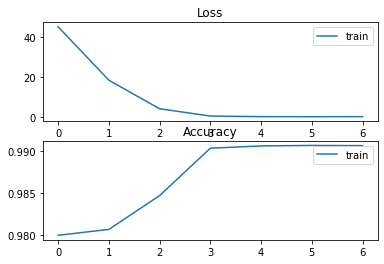

In [44]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()
pyplot.show()

In [3]:
#LSTM ragged tensor
data3 = data.drop(['sno','ca','xrd'],1)
data3 = data3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

year_data = data3.drop(data3.iloc[:, 3:18], inplace = False, axis = 1)

#data3 = data3.drop(['gvkey','fyear'],1)
#data3 = data3.drop(['gvkey','fyear'],1)

In [4]:
data3

,gvkey,fyear,target,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
0,1004,2000,0,701.854,874.255,18.531,13.134,340.212,13.809,2.500,320.590,204.065,179.987,9.157,5080.0
1,1004,2001,0,710.199,638.721,-58.939,12.112,310.235,34.522,2.200,286.588,139.603,217.699,4.430,5080.0
2,1004,2002,0,686.621,606.337,-12.410,9.930,294.988,29.154,2.100,259.954,124.106,164.658,0.797,5080.0
3,1004,2003,0,709.292,651.958,3.504,10.286,301.684,41.010,2.300,247.245,131.884,248.666,0.000,5080.0
4,1004,2004,0,732.230,747.848,18.572,13.033,314.744,50.338,2.600,255.477,142.450,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,319507,2016,0,28.426,0.000,-40.324,0.000,9.809,21.830,0.006,0.000,-50.268,0.000,0.000,2836.0
224978,319507,2017,0,29.188,0.000,-44.810,0.000,-8.908,22.651,0.008,0.000,-93.370,14.057,0.000,2836.0
224984,324684,2017,0,51.334,0.000,-39.892,0.291,35.513,50.573,0.047,0.000,-90.284,7.412,0.000,2836.0
224985,325211,2017,0,361.871,198.075,13.905,31.421,280.301,36.835,0.097,8.215,241.062,0.000,6.733,1311.0


In [5]:
year_data

,gvkey,fyear,target
0,1004,2000,0
1,1004,2001,0
2,1004,2002,0
3,1004,2003,0
4,1004,2004,0
...,...,...,...
224977,319507,2016,0
224978,319507,2017,0
224984,324684,2017,0
224985,325211,2017,0


In [6]:
X_old = data3.drop(['target'],1)
Y_old = data3.target


#X_old = X_old.to_numpy(dtype = 'float32')
#Y_old = data3.target(dtype = 'int32')

Y_oldd = year_data.drop(['fyear'],1)
Y_oldd


,gvkey,target
0,1004,0
1,1004,0
2,1004,0
3,1004,0
4,1004,0
...,...,...
224977,319507,0
224978,319507,0
224984,324684,0
224985,325211,0


In [7]:
#Modifying the dataframe for ragged data
X = []
Y = []


lookback =10
start = 0
index = 0
end = 0
maxLen = end - start 
while index< len(year_data)-1: 
    cid = year_data.iloc[index]['gvkey']
    start = index
    end = index
    while end<len(year_data):
        if year_data.iloc[end]['gvkey'] == year_data.iloc[index]['gvkey']:
            end+=1
            
        else:
            #sample.append(data3[start: end])
            X.append(X_old[start: end])
            Y.append(Y_old[start: end])
            index = end
            break
            
    if maxLen < (end - start):
        maxLen = end - start

In [11]:
import tensorflow as tf
def get_ragged_constants(data):
    return tf.RaggedTensor.from_row_lengths(
        values=data.values,
        row_lengths=data.groupby('gvkey').size())



In [12]:
X_old = get_ragged_constants(X_old)
X_old

<tf.RaggedTensor [[[1004.0, 2000.0, 701.854, 874.255, 18.531, 13.134, 340.212, 13.809, 2.5,
   320.59, 204.065, 179.987, 9.157, 5080.0],
  [1004.0, 2001.0, 710.199, 638.721, -58.939, 12.112, 310.235, 34.522, 2.2,
   286.588, 139.603, 217.699, 4.43, 5080.0],
  [1004.0, 2002.0, 686.621, 606.337, -12.41, 9.93, 294.988, 29.154, 2.1,
   259.954, 124.106, 164.658, 0.797, 5080.0],
  [1004.0, 2003.0, 709.292, 651.958, 3.504, 10.286, 301.684, 41.01, 2.3,
   247.245, 131.884, 248.666, 0.0, 5080.0],
  [1004.0, 2004.0, 732.23, 747.848, 18.572, 13.033, 314.744, 50.338, 2.6,
   255.477, 142.45, 227.159, 0.0, 5080.0],
  [1004.0, 2005.0, 978.819, 897.284, 35.163, 16.296, 422.717, 121.738, 3.3,
   323.592, 183.55, 318.576, 0.0, 5080.0],
  [1004.0, 2006.0, 1067.633, 1061.169, 59.447, 29.891, 494.243, 83.317,
   3.9, 342.593, 242.153, 253.611, 0.0, 5080.0],
  [1004.0, 2007.0, 1362.01, 1384.919, 75.745, 30.334, 585.255, 112.435,
   5.4, 435.608, 318.184, 507.918, 0.0, 5080.0],
  [1004.0, 2008.0, 1377.511,

In [16]:
#second set of hyperparameters
max_seq = X_old.bounding_shape()[-1]

mdl = tf.keras.Sequential([
    # Input Layer with shape = [Any,  maximum sequence length]                      
    tf.keras.layers.Input(shape=[None,max_seq], dtype=tf.float32, ragged=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='softmax')
])

# CategoricalCrossentropy
mdl.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

mdl.summary()
#history = mdl.fit(X_old, Y, epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                20224     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20,289
Trainable params: 20,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
#second set of hyperparameters
max_seq = X_old.bounding_shape()[-1]

mdl = tf.keras.Sequential([
    # Input Layer with shape = [Any,  maximum sequence length]                      
    tf.keras.layers.Input(shape=[None,max_seq], dtype=tf.float32, ragged=True),
    tf.keras.layers.LSTM(4),
    tf.keras.layers.Dense(1)
])

# CategoricalCrossentropy
mdl.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

mdl.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 304       
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [20]:
#LSTM - padding technique

data4 = data.drop(['sno','ca','xrd'],1)
data4 = data4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#data4 = data4.to_numpy()

year_data1 = data4.drop(data3.iloc[:, 3:18], inplace = False, axis = 1)

data4 = data4.drop(['gvkey','fyear'],1)
print(data4.columns)

data4

Index(['target', 'at', 'revt', 'ib', 'capx', 'ceq', 'che', 'emp', 'invt', 're',
       'dltt', 'dv', 'sic'],
      dtype='object')


,target,at,revt,ib,capx,ceq,che,emp,invt,re,dltt,dv,sic
0,0,701.854,874.255,18.531,13.134,340.212,13.809,2.500,320.590,204.065,179.987,9.157,5080.0
1,0,710.199,638.721,-58.939,12.112,310.235,34.522,2.200,286.588,139.603,217.699,4.430,5080.0
2,0,686.621,606.337,-12.410,9.930,294.988,29.154,2.100,259.954,124.106,164.658,0.797,5080.0
3,0,709.292,651.958,3.504,10.286,301.684,41.010,2.300,247.245,131.884,248.666,0.000,5080.0
4,0,732.230,747.848,18.572,13.033,314.744,50.338,2.600,255.477,142.450,227.159,0.000,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224977,0,28.426,0.000,-40.324,0.000,9.809,21.830,0.006,0.000,-50.268,0.000,0.000,2836.0
224978,0,29.188,0.000,-44.810,0.000,-8.908,22.651,0.008,0.000,-93.370,14.057,0.000,2836.0
224984,0,51.334,0.000,-39.892,0.291,35.513,50.573,0.047,0.000,-90.284,7.412,0.000,2836.0
224985,0,361.871,198.075,13.905,31.421,280.301,36.835,0.097,8.215,241.062,0.000,6.733,1311.0


In [21]:
raggeddata = []

start = 0
index = 0
end = 0
maxLen = end - start 
while index < len(year_data1)-1: 
    cid = year_data1.iloc[index]['gvkey']
    start = index
    end = index
    while end<len(year_data1):
        if year_data1.iloc[end]['gvkey'] == year_data1.iloc[index]['gvkey']:
            end+=1
            
        else:
            #sample.append(data3[start: end])
            raggeddata.append(data4[start: end])
            index = end
            break
            
    if maxLen < (end - start):
        maxLen = end - start


In [23]:

temp = {'target': 0, 'at': 0, 'revt': 0, 'ib': 0,  'capx': 0,
       'ceq': 0, 'che': 0, 'emp': 0, 'invt': 0, 're': 0, 'dltt': 0, 'dv': 0, 'sic': 0}

for i in range(0,len(raggeddata)):
   
    if len(raggeddata[i]) < maxLen:
        j = len(raggeddata[i])
        for k in range(j,maxLen):
            raggeddata[i] = raggeddata[i].append(temp,ignore_index=True)
            #raggeddata[i] = np.vstack([raggeddata[i],temp])
          

In [28]:
import pandas as pd
  
# create an Empty DataFrame object

df = pd.DataFrame()

for i in range(0, len(raggeddata)):
    
    df = df.append(raggeddata[i],ignore_index=True)
paddedDataFrame = df

In [30]:
import numpy as np
def split_data(paddedDataFrame, lookback):
    data_raw = paddedDataFrame.to_numpy() # convert to numpy array
    data_new = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data_new.append(data_raw[index: index + lookback])
    
    data_new = np.array(data_new);
    test_set_size = int(np.round(0.2*data_new.shape[0]));
    train_set_size = data_new.shape[0] - (test_set_size);
    
    x_train = data_new[:train_set_size,:-1,:]
    y_train = data_new[:train_set_size,-1,:]
    
    x_test = data_new[train_set_size:,:-1]
    y_test = data_new[train_set_size:,-1,:]
    
    print(data_new)
    
    return [x_train, y_train, x_test, y_test]
lookback = 18 # choose sequence length
x_train, y_train, x_test, y_test = split_data(paddedDataFrame, lookback)

[[[0.00000e+00 7.01854e+02 8.74255e+02 ... 1.79987e+02 9.15700e+00
   5.08000e+03]
  [0.00000e+00 7.10199e+02 6.38721e+02 ... 2.17699e+02 4.43000e+00
   5.08000e+03]
  [0.00000e+00 6.86621e+02 6.06337e+02 ... 1.64658e+02 7.97000e-01
   5.08000e+03]
  ...
  [0.00000e+00 1.44210e+03 1.66260e+03 ... 1.36100e+02 1.04000e+01
   5.08000e+03]
  [0.00000e+00 1.50410e+03 1.76760e+03 ... 1.55300e+02 1.02000e+01
   5.08000e+03]
  [0.00000e+00 1.52470e+03 1.74830e+03 ... 1.77200e+02 1.03000e+01
   5.08000e+03]]

 [[0.00000e+00 7.10199e+02 6.38721e+02 ... 2.17699e+02 4.43000e+00
   5.08000e+03]
  [0.00000e+00 6.86621e+02 6.06337e+02 ... 1.64658e+02 7.97000e-01
   5.08000e+03]
  [0.00000e+00 7.09292e+02 6.51958e+02 ... 2.48666e+02 0.00000e+00
   5.08000e+03]
  ...
  [0.00000e+00 1.50410e+03 1.76760e+03 ... 1.55300e+02 1.02000e+01
   5.08000e+03]
  [0.00000e+00 1.52470e+03 1.74830e+03 ... 1.77200e+02 1.03000e+01
   5.08000e+03]
  [0.00000e+00 3.97050e+03 3.28790e+03 ... 1.65000e+01 0.00000e+00
   3.6

In [31]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [32]:
input_dim = 13
hidden_dim = 1
num_layers = 1
output_dim = 13
num_epochs = 100

In [33]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [34]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [35]:
x_train

tensor([[[0.0000e+00, 7.0185e+02, 8.7426e+02,  ..., 1.7999e+02,
          9.1570e+00, 5.0800e+03],
         [0.0000e+00, 7.1020e+02, 6.3872e+02,  ..., 2.1770e+02,
          4.4300e+00, 5.0800e+03],
         [0.0000e+00, 6.8662e+02, 6.0634e+02,  ..., 1.6466e+02,
          7.9700e-01, 5.0800e+03],
         ...,
         [0.0000e+00, 1.5150e+03, 1.5943e+03,  ..., 8.5000e+01,
          1.2500e+01, 5.0800e+03],
         [0.0000e+00, 1.4421e+03, 1.6626e+03,  ..., 1.3610e+02,
          1.0400e+01, 5.0800e+03],
         [0.0000e+00, 1.5041e+03, 1.7676e+03,  ..., 1.5530e+02,
          1.0200e+01, 5.0800e+03]],

        [[0.0000e+00, 7.1020e+02, 6.3872e+02,  ..., 2.1770e+02,
          4.4300e+00, 5.0800e+03],
         [0.0000e+00, 6.8662e+02, 6.0634e+02,  ..., 1.6466e+02,
          7.9700e-01, 5.0800e+03],
         [0.0000e+00, 7.0929e+02, 6.5196e+02,  ..., 2.4867e+02,
          0.0000e+00, 5.0800e+03],
         ...,
         [0.0000e+00, 1.4421e+03, 1.6626e+03,  ..., 1.3610e+02,
          1.040

In [36]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  331069408.0
Epoch  1 MSE:  331069376.0
Epoch  2 MSE:  331069376.0
Epoch  3 MSE:  331069376.0
Epoch  4 MSE:  331069344.0
Epoch  5 MSE:  331069312.0
Epoch  6 MSE:  331069248.0
Epoch  7 MSE:  331069248.0
Epoch  8 MSE:  331069248.0
Epoch  9 MSE:  331069216.0
Epoch  10 MSE:  331069216.0
Epoch  11 MSE:  331069152.0
Epoch  12 MSE:  331069152.0
Epoch  13 MSE:  331069120.0
Epoch  14 MSE:  331069120.0
Epoch  15 MSE:  331069120.0
Epoch  16 MSE:  331069056.0
Epoch  17 MSE:  331069056.0
Epoch  18 MSE:  331069024.0
Epoch  19 MSE:  331068992.0
Epoch  20 MSE:  331068992.0
Epoch  21 MSE:  331068928.0
Epoch  22 MSE:  331068864.0
Epoch  23 MSE:  331068864.0
Epoch  24 MSE:  331068832.0
Epoch  25 MSE:  331068832.0
Epoch  26 MSE:  331068800.0
Epoch  27 MSE:  331068768.0
Epoch  28 MSE:  331068768.0
Epoch  29 MSE:  331068736.0
Epoch  30 MSE:  331068672.0
Epoch  31 MSE:  331068640.0
Epoch  32 MSE:  331068640.0
Epoch  33 MSE:  331068576.0
Epoch  34 MSE:  331068544.0
Epoch  35 MSE:  331068512.0
Ep

In [39]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [41]:
model1 = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion1 = torch.nn.MSELoss(reduction='mean')
optimiser1 = torch.optim.Adam(model1.parameters(), lr=0.01)

In [42]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []
for t in range(num_epochs):
    y_train_pred = model1(x_train)
    loss = criterion1(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser1.zero_grad()
    loss.backward()
    optimiser1.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  331070016.0
Epoch  1 MSE:  331069984.0
Epoch  2 MSE:  331069952.0
Epoch  3 MSE:  331069920.0
Epoch  4 MSE:  331069920.0
Epoch  5 MSE:  331069888.0
Epoch  6 MSE:  331069856.0
Epoch  7 MSE:  331069856.0
Epoch  8 MSE:  331069824.0
Epoch  9 MSE:  331069760.0
Epoch  10 MSE:  331069728.0
Epoch  11 MSE:  331069728.0
Epoch  12 MSE:  331069728.0
Epoch  13 MSE:  331069664.0
Epoch  14 MSE:  331069632.0
Epoch  15 MSE:  331069632.0
Epoch  16 MSE:  331069600.0
Epoch  17 MSE:  331069600.0
Epoch  18 MSE:  331069536.0
Epoch  19 MSE:  331069504.0
Epoch  20 MSE:  331069504.0
Epoch  21 MSE:  331069472.0
Epoch  22 MSE:  331069408.0
Epoch  23 MSE:  331069408.0
Epoch  24 MSE:  331069376.0
Epoch  25 MSE:  331069376.0
Epoch  26 MSE:  331069344.0
Epoch  27 MSE:  331069312.0
Epoch  28 MSE:  331069312.0
Epoch  29 MSE:  331069248.0
Epoch  30 MSE:  331069248.0
Epoch  31 MSE:  331069248.0
Epoch  32 MSE:  331069184.0
Epoch  33 MSE:  331069184.0
Epoch  34 MSE:  331069120.0
Epoch  35 MSE:  331069120.0
Ep